# Hyun-Joon Yang
# yanghyun@usc.edu
# BISC 478
# HW2
<hr>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output_jpeg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np

## Q1 [20 points]
### A) [5 points] List the suffixes of the string T = ATATAAT$.

* \$
* T\$
* AT\$
* AAT\$
* TAAT\$
* ATAAT\$
* TATAAT\$
* ATATAAT\$

### B) [5 points] Draw the suffix trie for T. Include edge labels. Enumerate your nodes 1, 2, . . . |V|, where |V| is the total number of nodes in the trie.

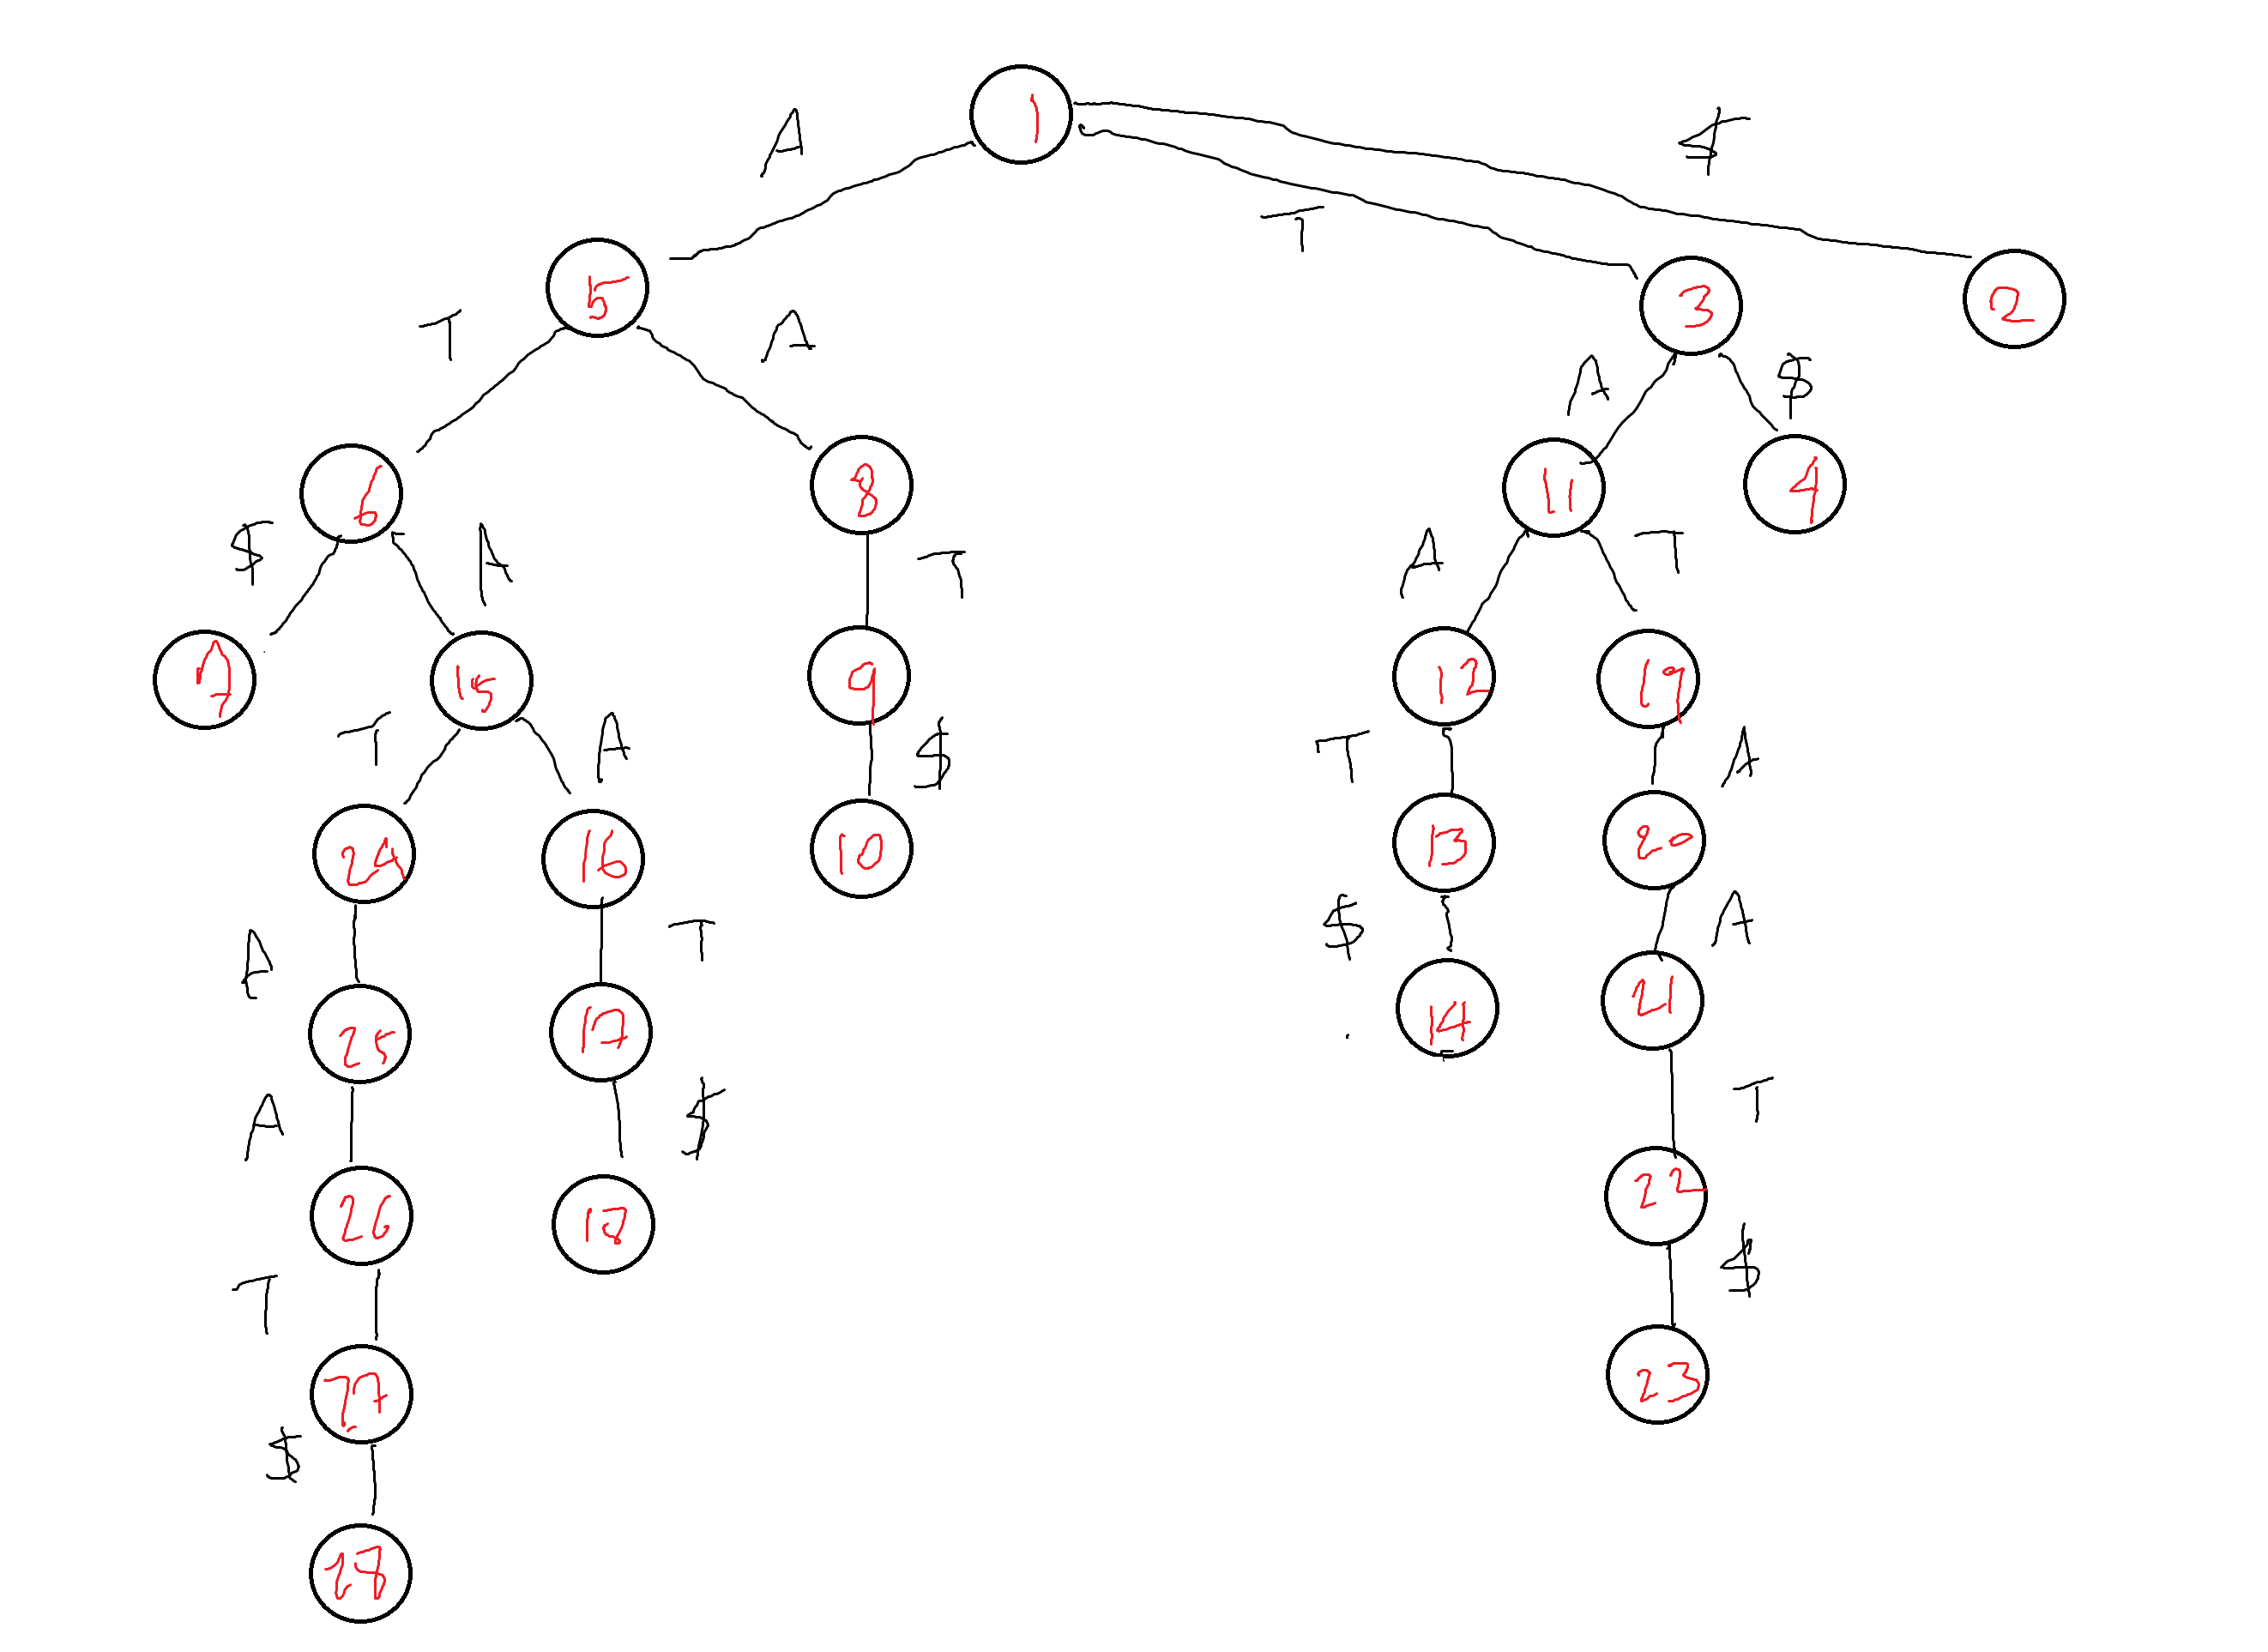

In [3]:
Image('img1-b.png')

### C) [5 points] Repeated sequences in T are shared prefixes of any suffix of T. Using the trie, list the repeated substrings of T.

* A
* T
* AT
* TA
* ATA

### D) [5 points] The depth of a node in a tree is the number of edges traversed on the path from the root to the node. A branching node is a parent node with more than one child. Can the branching node with the maximum depth among all branching nodes in a trie have a depth different from the longest repeat in T? Explain your answer.

No - the longest repeat is found by finding the deepest node with more than one child (more than one child => repeat), so by definition must always have the same depth as the branching node with maximum depth.

## Q2 [25 points]

#### COVID-19 PCR primer
<br>
RT-qPCR is commonly used for clinical diagnosis of Coronavirus disease 2019 (COVID-19).
The genome sequence of COVID-19 (<a ref="https://www.ncbi.nlm.nih.gov/nuccore/MN908947">MN908947.3</a>) is available in the public database. Now you are given a set of short sequences:
<br>

seq1: CCCTGTGGGTTTTACACTTAA <br>
seq2: TCATAGGCTGCGGTATCGGC <br>
seq3: TTATAAACTACGGTATCGGC <br>
seq4: ACGATTGTGCATCAGCTGA <br>

Your task is to determine the potential primers for COVID-19 diagnosis among the four sequences above using the basic local alignment search tool (BLAST). A BLAST search enables
a researcher to compare a subject protein or nucleotide sequence (called a query) with a library
or database of sequences, and identify database sequences that resemble the query sequence
above a certain threshold.

### A) [10 points] Perform [BLAST search](https://blast.ncbi.nlm.nih.gov/Blast.cgi) for the above sequences using COVID-19 genome as the database. Use Nucleotide BLAST and restrict the query to the COVID-19 genome by mentioning genome ID (MN908947.3) in the Entrez Query field. Make sure you enter the sequences in FASTA format. Report the query coverage (Query Cover) and percentage identity (Per. Ident) available on the result page for each of the sequences (seq 1-4).

* seq1: 21/21; 100%
* seq2: 9/20; 45%
* seq3: 9/20; 45%
* seq4: 19/19; 100%

### B) [10 points] Based on the results from the BLAST search, identify the two primer sequences.

Seq1 and Seq4

### C) [5 points] Report the forward and reverse primer. [Hint: Use Graphics visualization for individual results under the Alignment tab to show the alignment]

* Forward primer: seq1
* Reverse primer: seq4

## Q3 [20 points]

#### Create a substitution scoring matrix

The goal of this question is to learn how to create a scoring matrix for nucleotides (A,C,G,T)
based on high confidence mutliple sequence alignment (MSA) block. We will use the same
strategy followed by the BLOSUM scoring matrixs creation. These are the steps to be followed:

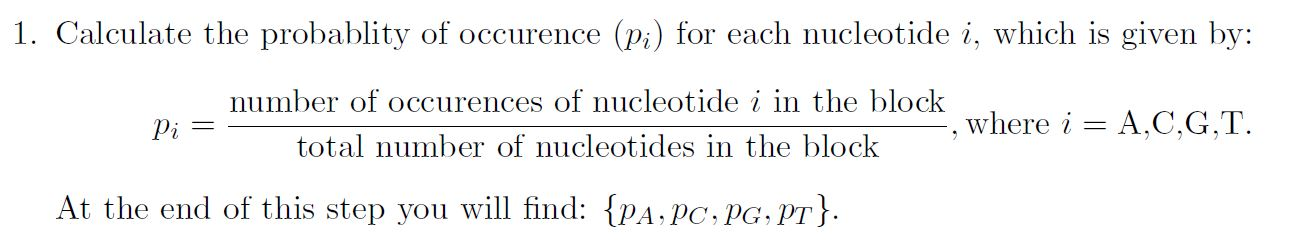

In [4]:
Image('img1.jpg')

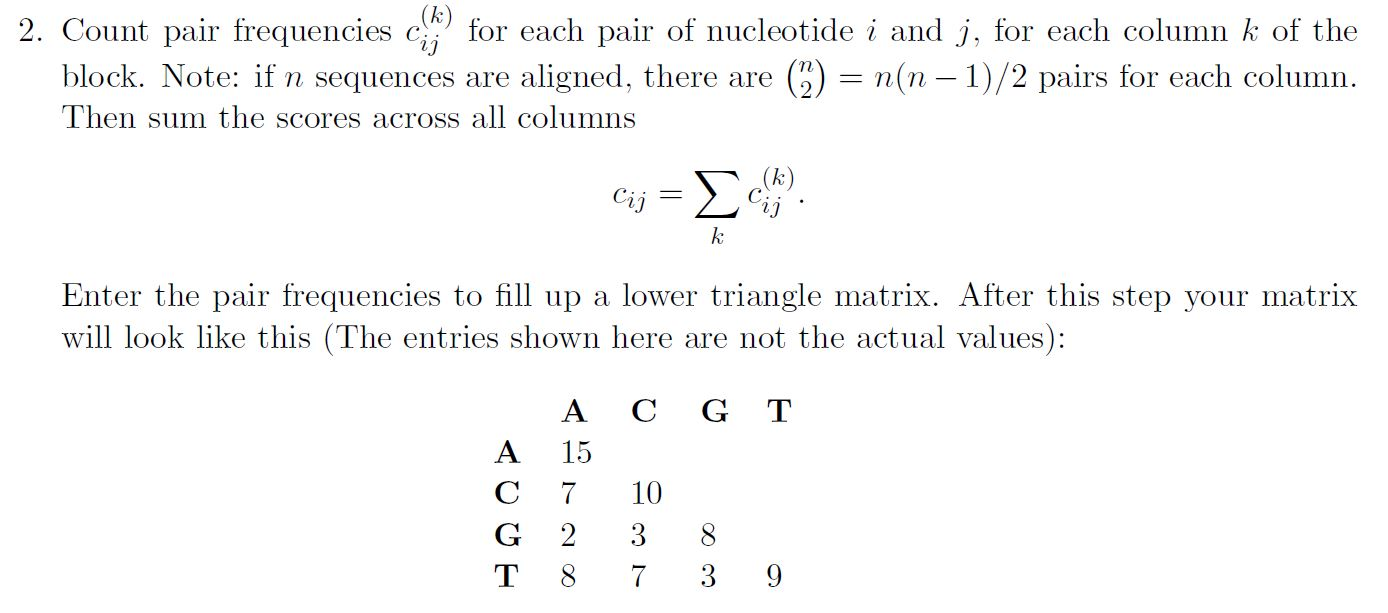

In [5]:
Image('img2.jpg')

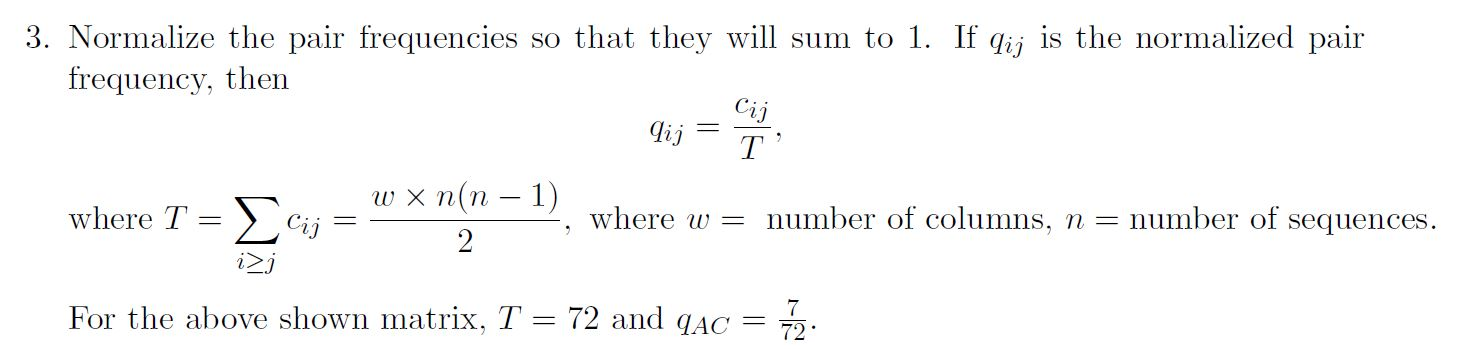

In [6]:
Image('img3.jpg')

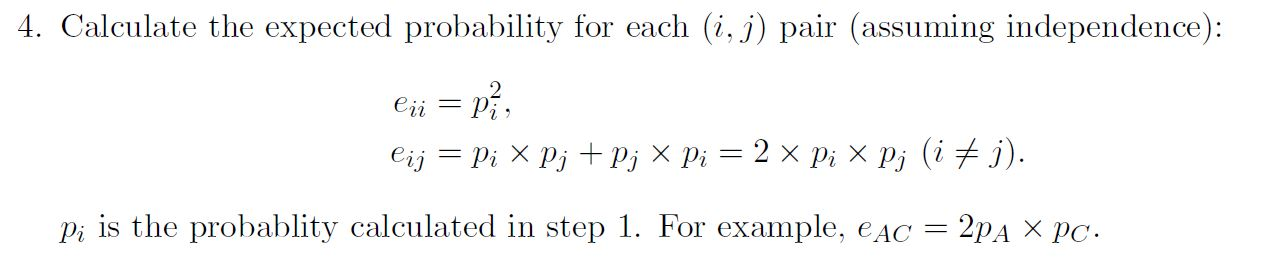

In [7]:
Image('img4.jpg')

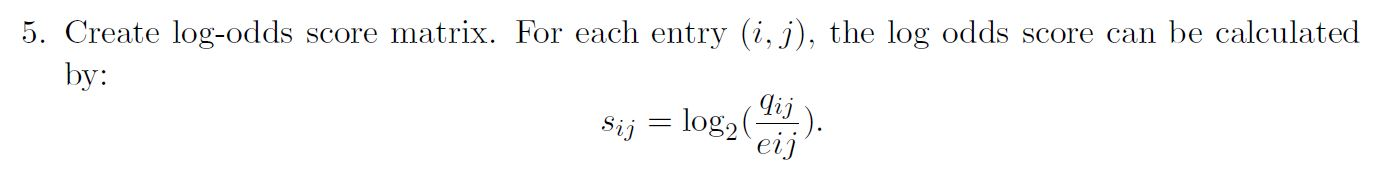

In [8]:
Image('img5.jpg')

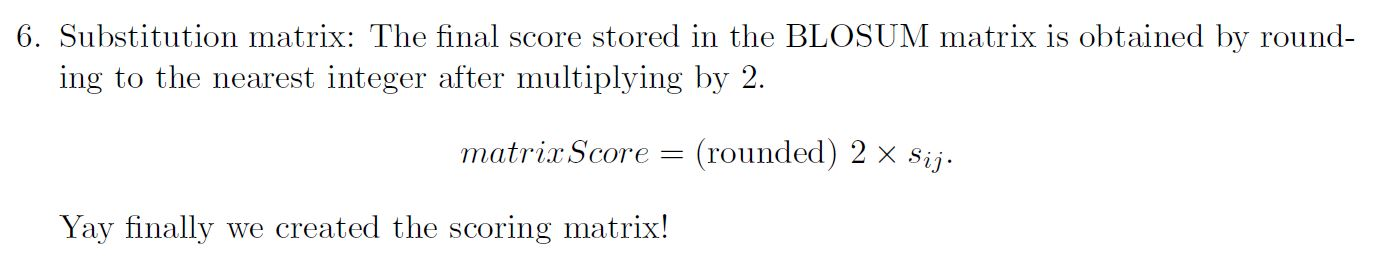

In [9]:
Image('img6.jpg')

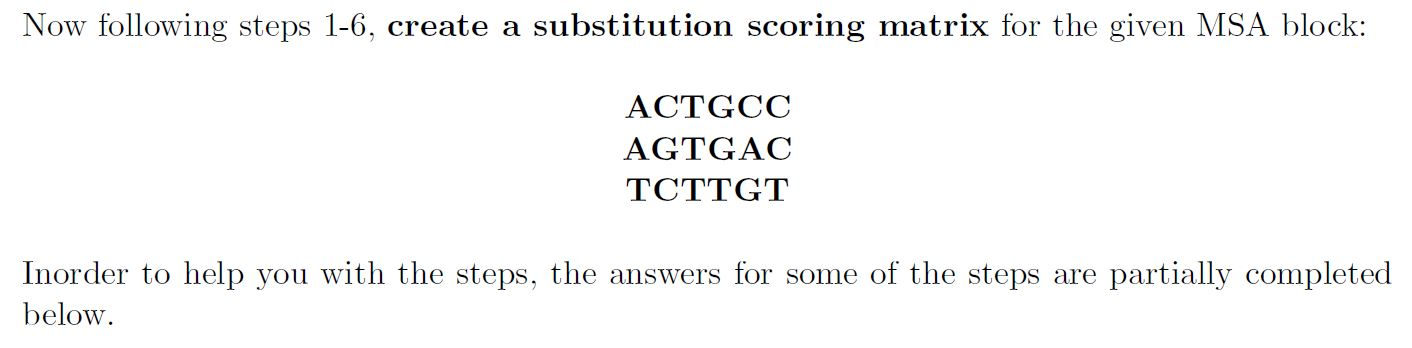

In [10]:
Image('img7.jpg')

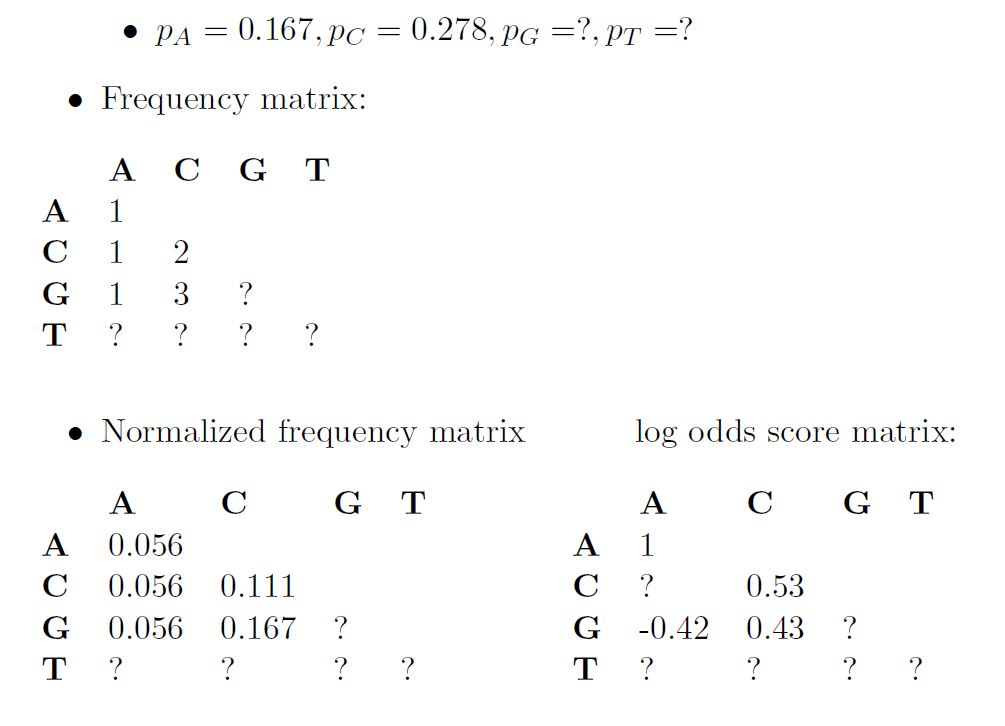

In [11]:
Image('img8.jpg')

#### 1. Calculate probabilites
$$ n_{tot} = 3 \times 6 = 18 $$
$$ n_A = 3, n_C = 5, n_G = 4, n_T = 6 $$

In [12]:
n_t = 18
n = {'A':3, 'C':5, 'G':4, 'T':6}
probs = {}
for i in n:
    probs[i] = n[i]/n_t
    print('P_' + i + ' = ' + str(probs[i]))

P_A = 0.16666666666666666
P_C = 0.2777777777777778
P_G = 0.2222222222222222
P_T = 0.3333333333333333


#### 2. Frequency matrix
$$ c_{ij} = \sum_k{c^{(k)}_{ij}} $$

$$ c_{AA} = 1 $$
$$ c_{AC} = 1 $$
$$ c_{AG} = 1 $$
$$ c_{AT} = 2 $$
$$ c_{CC} = 2 $$
$$ c_{CG} = 3 $$
$$ c_{CT} = 2 $$
$$ c_{GG} = 1 $$
$$ c_{GT} = 2 $$
$$ c_{TT} = 3 $$

In [13]:
freq_m = np.zeros((4,4))
cols = [[1, 1, 1, 2], [2, 3, 2], [1, 2], [3]]
freq_m[0,0] = cols[0][0]
for i in range(len(cols)):
    for j in range(len(cols[i])):
        freq_m[j+i,i] = cols[i][j]
        freq_m[i,j+i] = cols[i][j]
print(freq_m)

[[1. 1. 1. 2.]
 [1. 2. 3. 2.]
 [1. 3. 1. 2.]
 [2. 2. 2. 3.]]


#### 3. Normalized frequency matrix
$$ T = \frac{w \times n(n-1)}{2} = \frac{6 \times 3(3-1)}{2} = 18$$

In [14]:
T = 18
norm_freq_m = freq_m / T
print(norm_freq_m)

[[0.05555556 0.05555556 0.05555556 0.11111111]
 [0.05555556 0.11111111 0.16666667 0.11111111]
 [0.05555556 0.16666667 0.05555556 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.16666667]]


#### 4. Calculate expected probability

In [15]:
def convert2letter(i: int):
    d = {0:'A', 1:'C', 2:'G', 3:'T'}
    return d[i]

In [16]:
exp_prob = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        if i == j:
            exp_prob[i,j] = probs[convert2letter(i)]**2
        else:
            exp_prob[i,j] = 2*probs[convert2letter(i)]*probs[convert2letter(j)]
        exp_prob[j,i] = exp_prob[i,j]
print(exp_prob)

[[0.02777778 0.09259259 0.07407407 0.11111111]
 [0.09259259 0.07716049 0.12345679 0.18518519]
 [0.07407407 0.12345679 0.04938272 0.14814815]
 [0.11111111 0.18518519 0.14814815 0.11111111]]


#### 5. Create log-odds score matrix

In [17]:
log_m = np.log2(norm_freq_m / exp_prob)
print(log_m)

[[ 1.         -0.73696559 -0.4150375   0.        ]
 [-0.73696559  0.52606881  0.43295941 -0.73696559]
 [-0.4150375   0.43295941  0.169925   -0.4150375 ]
 [ 0.         -0.73696559 -0.4150375   0.5849625 ]]


#### 6. Substitution matrix

In [18]:
sub_m = 2*log_m
print(sub_m)
sub_m[sub_m % 1 >= 0.5] = sub_m[sub_m % 1 >= 0.5] // 1 + 1
sub_m[sub_m % 1 < 0.5] = sub_m[sub_m % 1 < 0.5] // 1
print(sub_m)

[[ 2.         -1.47393119 -0.830075    0.        ]
 [-1.47393119  1.05213762  0.86591881 -1.47393119]
 [-0.830075    0.86591881  0.33985    -0.830075  ]
 [ 0.         -1.47393119 -0.830075    1.169925  ]]
[[ 2. -1. -1.  0.]
 [-1.  1.  1. -1.]
 [-1.  1.  0. -1.]
 [ 0. -1. -1.  1.]]


## Q4 [15 points]

#### Global sequence alignment

Given two sequences:

$$GCATAC \mbox{ and } GATACA$$

Using the substitution matrix from Question 3 and $\mbox{gap penalty value} = -1$,

### A) [10 points] Find the optimal global alignment(s). Partially filled dynamic program table is shown below:

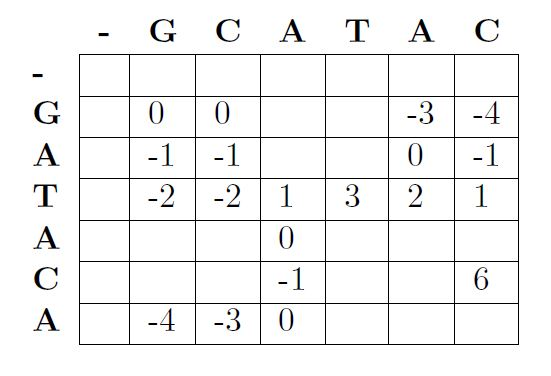

In [19]:
Image('img4-1.jpg')

In [20]:
def getMatch(x: 'char', y: 'char', m: 'np.ndarray'):
    """
    compares x and y and returns correct score depending on match or mismatch
    """
    ind = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    if x == '_' or y == '_':
        return 0
    return m[ind[x], ind[y]]

In [21]:
def fillMGlobal(X: str, Y: str, m: 'np.ndarray', penalty_gap: int):
    """
    fill array for row string X and column string Y for global alignment
    """
    # create empty memoization matrix of size |X|+1 x |Y|+1
    M = np.empty((len(Y)+1,len(X)+1), dtype='int64')
    # initialze matrix with necessary default values
    for i in range(len(X)+1):
        M[0,i] = i * penalty_gap
    for j in range(len(Y)+1):
        M[j,0] = j* penalty_gap
    # fill in array
    # j => jth row, i => ith column
    for j in range(1, len(Y)+1):
        for i in range(1, len(X)+1):
            match = M[j-1,i-1] + getMatch(X[i-1], Y[j-1], m)
            y_gap = M[j-1,i] + penalty_gap
            x_gap = M[j,i-1] + penalty_gap
            M[j,i] = max(match, y_gap, x_gap)
    return M

In [22]:
def findAlignGlobal(X: str, Y: str, M: 'numpy.ndarray', m: 'numpy.ndarray', penalty_gap: int):
    """
    find global alignment
    """
    xlen = M.shape[1]
    ylen = M.shape[0]
    
    X = '_' + X
    Y = '_' + Y
    X_align = ''
    Y_align = ''
    opt_row = ylen-1
    opt_col = xlen-1
    
    if xlen == 1:
        return X_align, Y[1:]
    if ylen == 1:
        return X[1:], Y_align
    
    for row in range(ylen-1, -1, -1):
        for col in range(xlen-1, -1, -1):
            if opt_row == 0 and opt_col == 0:
                break
            if opt_row != row or opt_col != col:
                continue
            if M[row, col] == M[row-1, col-1] + getMatch(X[col], Y[row], m):
                X_align += X[col]
                Y_align += Y[row]
                opt_row = row-1
                opt_col = col-1
            elif M[row, col] == M[row-1, col] + penalty_gap:
                X_align += '_'
                Y_align += Y[row]
                opt_row = row-1
            elif M[row, col] == M[row, col-1] + penalty_gap:
                X_align += X[col]
                Y_align += '_'
                opt_col = col-1
    return X_align[::-1], Y_align[::-1]

In [23]:
m = sub_m
M = fillMGlobal('GCATAC', 'GATACA', m, -1)
print(M)

[[ 0 -1 -2 -3 -4 -5 -6]
 [-1  0  0 -1 -2 -3 -4]
 [-2 -1 -1  2  1  0 -1]
 [-3 -2 -2  1  3  2  1]
 [-4 -3 -3  0  2  5  4]
 [-5 -3 -2 -1  1  4  6]
 [-6 -4 -3  0  0  3  5]]


In [24]:
findAlignGlobal('GCATAC', 'GATACA', M, m, -1)

('GCATAC_', '_GATACA')

### B) [5 points] Is there anything unusual in the optimal alignment? Comment.

The first letter G in GCATAC was mathed with a gap even when GATACA starts with a G due to the scoring matrix.

## Q5 [10 points]

#### Local sequence alignment

Given two sequences:

$$CATCGC \mbox{ and } TATCGT$$

Using the substitution matrix given below and $\mbox{gap penalty value} = -3$, compute the optimal
local alignment(s) using Smith-Waterman algorithm.

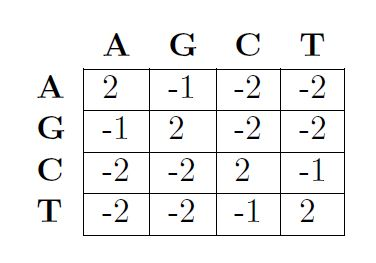

In [25]:
Image('img5-1.jpg')

Partially filled dynamic program table is shown below:

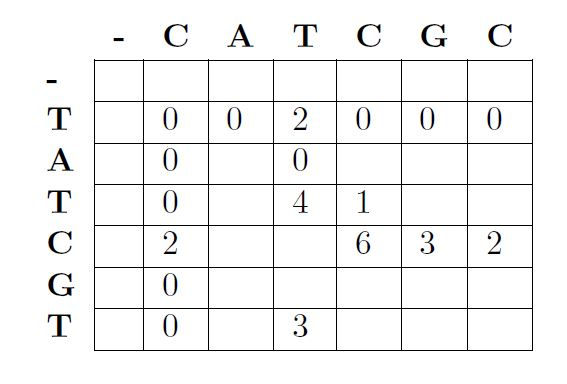

In [26]:
Image('img5-2.jpg')

In [27]:
def getMatch(x: 'char', y: 'char', m: 'np.ndarray'):
    """
    compares x and y and returns correct score depending on match or mismatch
    """
    ind = {'A': 0, 'G': 1, 'C': 2, 'T': 3}
    if x == '_' or y == '_':
        return 0
    return m[ind[x], ind[y]]

In [28]:
def fillMLocal(X: str, Y: str, m: 'np.ndarray', penalty_gap: int):
    """
    fill array for row string X and column string Y for local alignment
    """
    # create empty memoization matrix of size |X|+1 x |Y|+1
    M = np.empty((len(Y)+1,len(X)+1), dtype='int64')
    # initialze matrix with necessary default values
    for i in range(len(X)+1):
        M[0,i] = 0
    for j in range(len(Y)+1):
        M[j,0] = 0
    # fill in array
    # j => jth row, i => ith column
    for j in range(1, len(Y)+1):
        for i in range(1, len(X)+1):
            match = M[j-1,i-1] + getMatch(X[i-1], Y[j-1], m)
            y_gap = M[j-1,i] + penalty_gap
            x_gap = M[j,i-1] + penalty_gap
            M[j,i] = max(match, y_gap, x_gap, 0)
    return M

In [29]:
m = np.array([[2, -1, -2, -2],[-1,2,-2,-2],[-2,-2,2,-1],[-2,-2,-1,2]])
# print(m)
M = fillMLocal('CATCGC', 'TATCGT', m, -3)
print(M)

[[0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 4 1 0 0]
 [0 2 0 1 6 3 2]
 [0 0 1 0 3 8 5]
 [0 0 0 3 0 5 7]]


ATCG